Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                346176    
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 347146 (1.32 MB)
Trainable params: 347146 (1.32 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

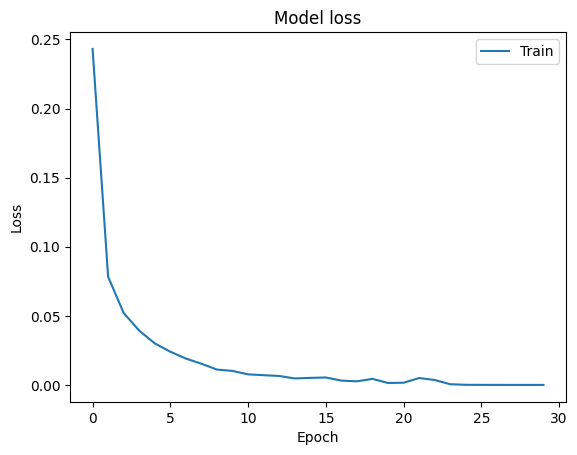

1875/1875 [==============================] - 12s 6ms/step
Liczba bledow ciagu treningowego:  0
1875/1875 [==============================] - 12s 6ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist;
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_train = train_images.reshape((60000,28,28,1))
x_test = test_images.reshape((10000,28,28,1))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


from keras import models
from keras import layers

model = models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

print( model.summary() )

history = model.fit(x_train, y_train, epochs=30, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(train_labels)):
 if y_result[i] != train_labels[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
from sklearn.metrics import multilabel_confusion_matrix

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded, average=None)
recall = recall_score(y_train, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), train_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

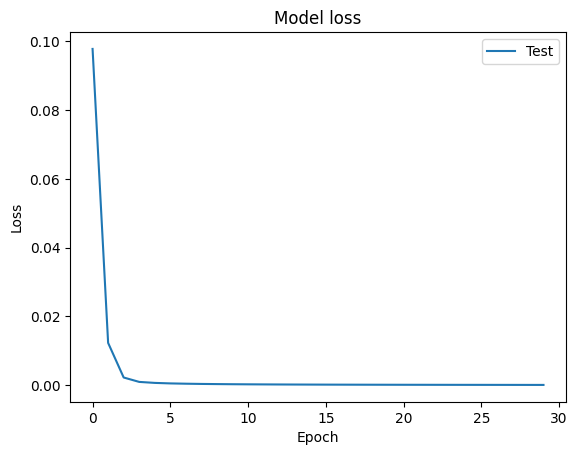

313/313 [==============================] - 2s 6ms/step
Liczba bledow ciagu testowego:  0
313/313 [==============================] - 2s 6ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


In [ ]:
history = model.fit(x_test, y_test, epochs=30, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(test_labels)):
 if y_result[i] != test_labels[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

y_pred = model.predict(x_test)

y_pred_rounded = [np.round(pred) for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average=None)
recall = recall_score(y_test, y_pred_rounded, average=None)

conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), test_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

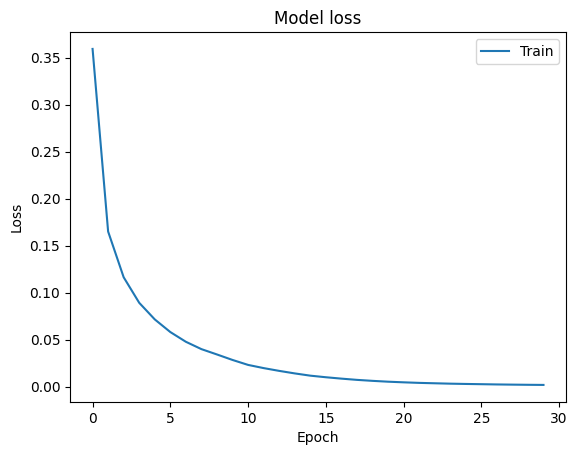

1875/1875 [==============================] - 10s 5ms/step
Liczba bledow ciagu treningowego:  1
1875/1875 [==============================] - 11s 6ms/step
Accuracy: 0.9999833333333333
Precision: [1.        0.9998517 1.        1.        1.        1.        1.
 1.        1.        1.       ]
Recall: [1.         1.         1.         1.         1.         1.
 1.         0.99984038 1.         1.        ]
Confusion Matrix:
 [[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    1    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6264    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


In [ ]:
x_train = train_images.reshape((60000, 28*28))
x_train = x_train.astype('float32') / 256
x_test = test_images.reshape((10000, 28*28))
x_test = x_test.astype('float32') / 256

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(784, activation='relu', input_dim=784))
model.add(Dense(784, activation='relu', input_dim=784))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.1), loss='categorical_crossentropy' ,metrics=['accuracy'] )

history = model.fit(x_train, y_train, epochs=30, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(train_labels)):
 if y_result[i] != train_labels[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded, average=None)
recall = recall_score(y_train, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), train_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

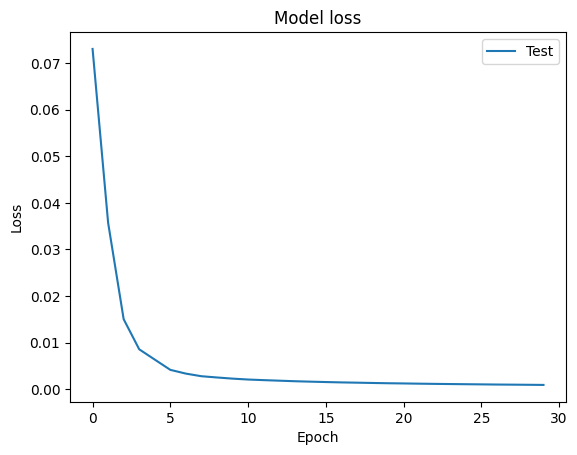

313/313 [==============================] - 2s 5ms/step
Liczba bledow ciagu testowego:  0
313/313 [==============================] - 1s 5ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


In [ ]:
history = model.fit(x_test, y_test, epochs=30, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(test_labels)):
 if y_result[i] != test_labels[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

y_pred = model.predict(x_test)

y_pred_rounded = [np.round(pred) for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average=None)
recall = recall_score(y_test, y_pred_rounded, average=None)

conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), test_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_10 (Dense)            (None, 64)               

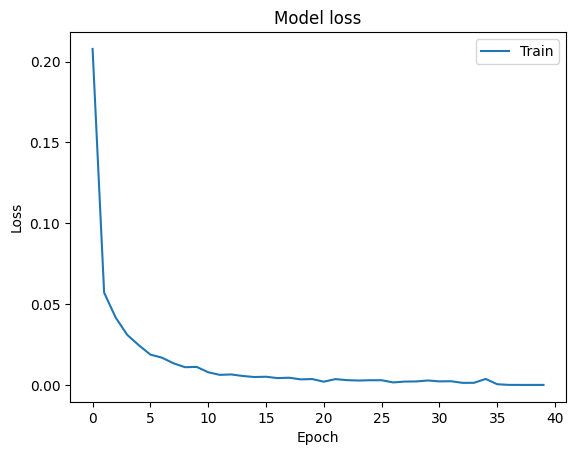

1875/1875 [==============================] - 18s 10ms/step
Liczba bledow ciagu treningowego:  0
1875/1875 [==============================] - 17s 9ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_train = train_images.reshape((60000,28,28,1))
x_test = test_images.reshape((10000,28,28,1))

x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

print( model.summary() )

history = model.fit(x_train, y_train, epochs=40, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(train_labels)):
 if y_result[i] != train_labels[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded, average=None)
recall = recall_score(y_train, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), train_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

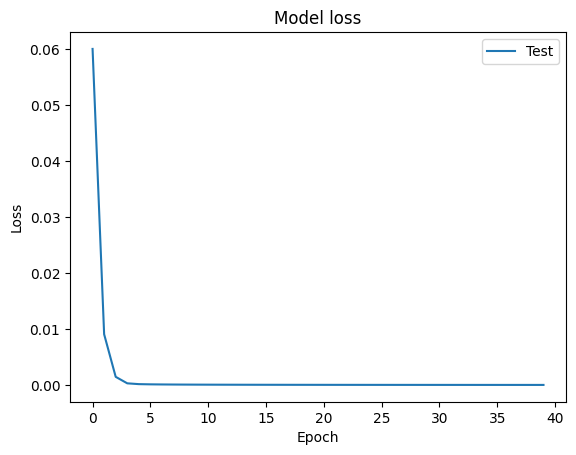

313/313 [==============================] - 3s 8ms/step
Liczba bledow ciagu testowego:  0
313/313 [==============================] - 4s 13ms/step
Accuracy: 1.0
Precision: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Recall: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Confusion Matrix:
 [[ 980    0    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0    0 1032    0    0    0    0    0    0    0]
 [   0    0    0 1010    0    0    0    0    0    0]
 [   0    0    0    0  982    0    0    0    0    0]
 [   0    0    0    0    0  892    0    0    0    0]
 [   0    0    0    0    0    0  958    0    0    0]
 [   0    0    0    0    0    0    0 1028    0    0]
 [   0    0    0    0    0    0    0    0  974    0]
 [   0    0    0    0    0    0    0    0    0 1009]]


In [ ]:
history = model.fit(x_test, y_test, epochs=40, batch_size=100, verbose=0)

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(test_labels)):
 if y_result[i] != test_labels[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

y_pred = model.predict(x_test)

y_pred_rounded = [np.round(pred) for pred in y_pred]

accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average=None)
recall = recall_score(y_test, y_pred_rounded, average=None)

conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), test_labels)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Mounted at /content/drive
1/1 [==============================] - 0s 108ms/step
Przewidziana etykieta:  [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


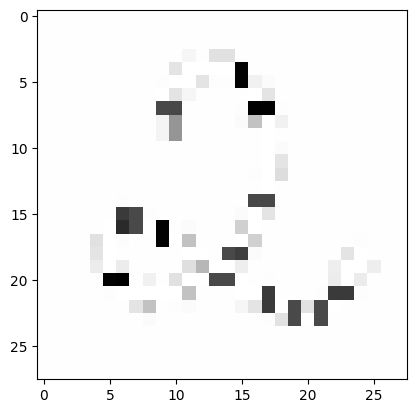

In [ ]:
import PIL
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

five = '/content/drive/MyDrive/five.png' # cyfra 5 została sklasyfikowana jakog cyfra 9
nine = '/content/drive/MyDrive/nine.png'
two = '/content/drive/MyDrive/two.png'

def returnArray(file):
  img_array = np.array(Image.open(file).convert('L'))
  x = img_array.flatten()[:28*28].reshape(1, 28, 28)
  x[:] = 1 - x
  return x

file = returnArray(two)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

image = file.reshape(28,28)
plt.imshow( image, cmap='Greys')

170498071/170498071 [==============================] - 3s 0us/step


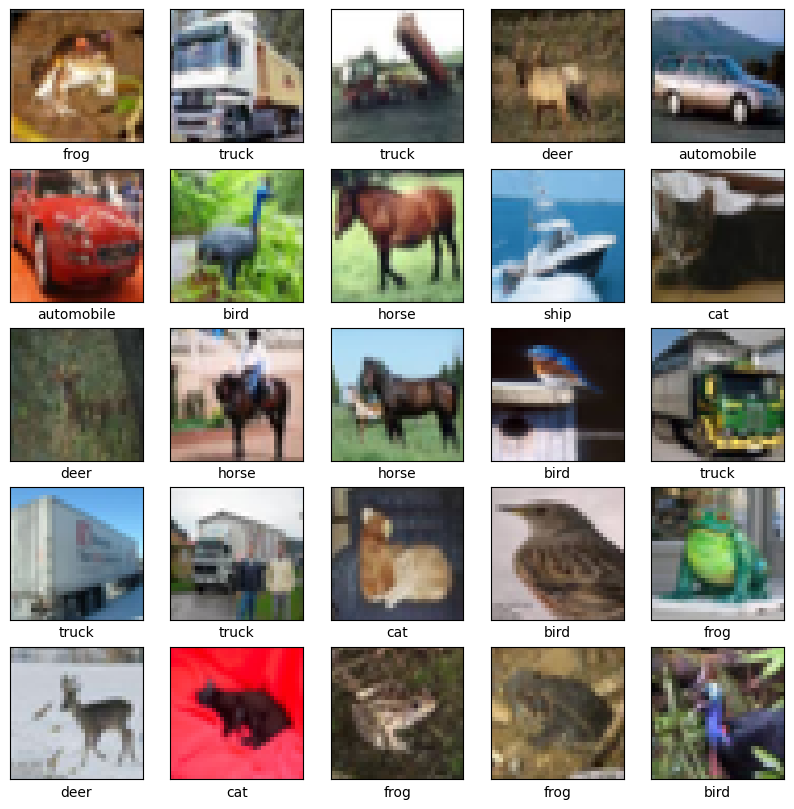

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist;
from keras.utils import to_categorical
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=[10,10])
for i in range (25): # pierwsze 25 obrazków
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_1

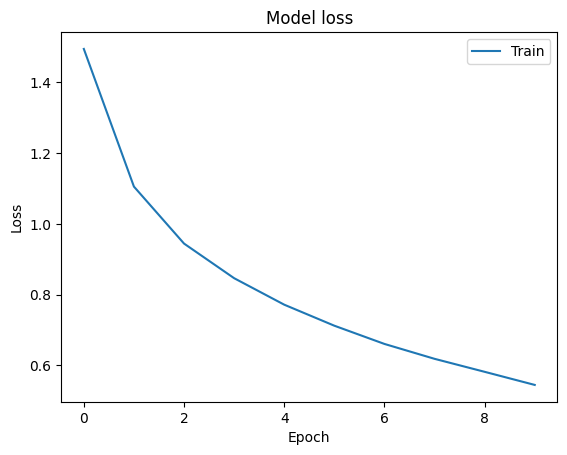

1563/1563 [==============================] - 23s 15ms/step
Liczba bledow ciagu treningowego:  7751
1563/1563 [==============================] - 22s 14ms/step
Accuracy: 0.78352
Precision: [0.90031153 0.97843006 0.8745     0.8106267  0.84507347 0.91726009
 0.95369697 0.91154009 0.91562438 0.93392709]
Recall: [0.867  0.88   0.6996 0.595  0.7822 0.541  0.7868 0.8594 0.9224 0.9018]
Confusion Matrix:
 [[4509   72  242   67   46   30   39   31  163  112]
 [   5 4506    7   10    1    4   12    0   25   80]
 [ 106   14 3901  246  168  261  179  101   18   27]
 [  29   14  162 3662  193  820  174   66    8   20]
 [  70   26  296  235 4304  262  180  161   12   13]
 [   7    1   74  343   34 3230   42   58    6    9]
 [  18   12  108  119   62   72 4274    5    2    7]
 [  27    4   78  176  161  265   27 4521    6   18]
 [ 172  129   98   89   25   27   41   13 4713   85]
 [  57  222   34   53    6   29   32   44   47 4629]]


In [ ]:
from keras import models
from keras import layers
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
from sklearn.metrics import multilabel_confusion_matrix

print(train_images.shape)
print(test_images.shape)

x_train = train_images.reshape((50000, 32,32, 3))
x_train = x_train.astype('float32')/255

x_test = test_images.reshape((10000, 32,32, 3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = models.Sequential()
model.add( layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

print( model.summary() )

history = model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1,
                    validation_data=(x_train, y_train))

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(train_labels)):
 if y_result[i] != train_labels[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded, average=None)
recall = recall_score(y_train, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), train_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_2 (

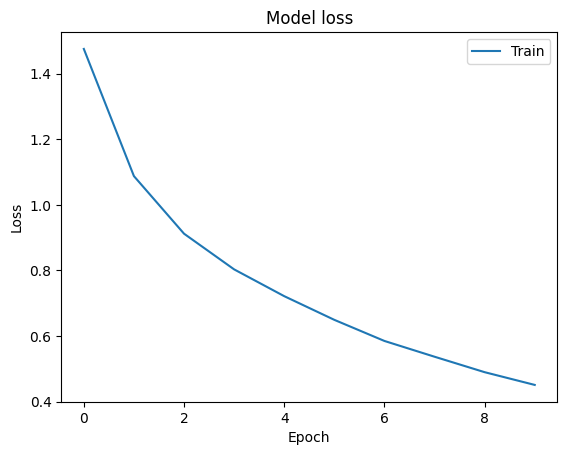

1563/1563 [==============================] - 57s 36ms/step
Liczba bledow ciagu treningowego:  5617
1563/1563 [==============================] - 57s 37ms/step
Accuracy: 0.85562
Precision: [0.91245253 0.95143707 0.92762512 0.79507858 0.91047074 0.92078954
 0.91023622 0.95098459 0.95811088 0.98609528]
Recall: [0.913  0.96   0.7562 0.769  0.8278 0.7184 0.9248 0.8886 0.9332 0.8652]
Confusion Matrix:
 [[4692   30  165   50   65   13   10   23  120  126]
 [  16 4851    9    7    3    5    9    2   40  210]
 [  55    8 4044  123  100   96   61   48   14   21]
 [  40   15  193 4160  199  734  109  102   46   53]
 [  32    5  211   99 4345  144   47  105   11   10]
 [   5    3   72  271   41 3805   34   92    7   17]
 [  28   15  205  204  137   77 4704   11    1   17]
 [  23    0   77   56   98  122    7 4598   12   14]
 [  90   35   18   20    9    3   19    7 4737   85]
 [  19   38    6   10    3    1    0   12   12 4447]]


In [ ]:
from keras import models
from keras import layers
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score
from sklearn.metrics import multilabel_confusion_matrix

print(train_images.shape)
print(test_images.shape)

x_train = train_images.reshape((50000, 32,32, 3))
x_train = x_train.astype('float32')/255

x_test = test_images.reshape((10000, 32,32, 3))
x_test = x_test.astype('float32')/255

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

model = models.Sequential()
model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(256, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

print( model.summary() )

history = model.fit(x_train, y_train, epochs=10, batch_size=10, verbose=1,
                    validation_data=(x_train, y_train))

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

predict_x = model.predict(x_train)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(train_labels)):
 if y_result[i] != train_labels[i]:
  bledy += 1

print("Liczba bledow ciagu treningowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_train)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_train, y_pred_rounded)
precision = precision_score(y_train, y_pred_rounded, average=None)
recall = recall_score(y_train, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), train_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 256)        

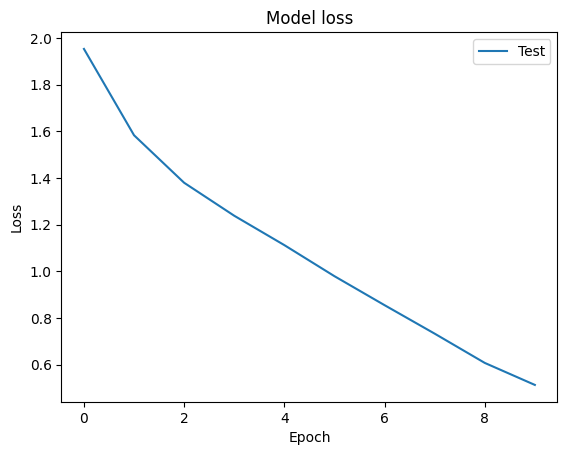

313/313 [==============================] - 13s 41ms/step
Liczba bledow ciagu testowego:  1274
313/313 [==============================] - 13s 41ms/step
Accuracy: 0.8354
Precision: [0.84141791 0.89275894 0.89530686 0.91679507 0.87881874 0.87319244
 0.93489318 0.96311907 0.96853147 0.98805257]
Recall: [0.902 0.974 0.744 0.595 0.863 0.785 0.919 0.914 0.831 0.827]
Confusion Matrix:
 [[921   9  48   6  14   4   1   2 100  31]
 [ 19 981   8  12   3   3   1   1  24  86]
 [ 23   0 812  44  35  31  16   9   5   4]
 [  0   1  18 699  10  54  11   5   7   4]
 [  5   1  62  48 897  31  29  29   3   1]
 [  4   0  28 118   8 837   2  22   1   4]
 [  4   2  13  54  19  15 938   1   2   3]
 [  2   1   6  10  12  23   0 931   1   4]
 [ 18   0   4   5   2   1   1   0 850   3]
 [  4   5   1   4   0   1   1   0   7 860]]


In [ ]:
model = models.Sequential()
model.add( layers.Conv2D(64, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(128, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Conv2D(256, (3,3), activation='relu', input_shape=(32,32,3)) )
model.add( layers.MaxPooling2D((2,2)) )
model.add( layers.Flatten() )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(64,activation='relu') )
model.add( layers.Dense(10,activation='softmax') )
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'] )

print( model.summary() )

history = model.fit(x_test, y_test, epochs=10, batch_size=10, verbose=1,
                    validation_data=(x_test, y_test))

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test'], loc='upper right')
plt.show()

predict_x = model.predict(x_test)
y_result = np.argmax(predict_x,axis=1)

bledy = 0
for i in range(len(test_labels)):
 if y_result[i] != test_labels[i]:
  bledy += 1

print("Liczba bledow ciagu testowego: ", bledy)

# Przewidywanie wyników
y_pred = model.predict(x_test)

# Zaokrąglenie wyników przewidywań
y_pred_rounded = [np.round(pred) for pred in y_pred]

# Obliczenie metryk
accuracy = accuracy_score(y_test, y_pred_rounded)
precision = precision_score(y_test, y_pred_rounded, average=None)
recall = recall_score(y_test, y_pred_rounded, average=None)

# Uzyskanie macierzy pomyłek
conf_matrix = confusion_matrix(np.argmax(predict_x, axis=-1), test_labels)

# Wyświetlanie wyników
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", conf_matrix)

In [ ]:
import PIL
from PIL import Image

from google.colab import drive
drive.mount('/content/drive')

frog = '/content/drive/MyDrive/żaba.png'

def returnArray(file):
    img = Image.open(file).convert('RGB')
    img_array = np.array(img)
    x = np.expand_dims(img_array, axis=0)
    x = 1 - x / 255.0
    return x

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/1 [==============================] - 0s 29ms/step
Przewidziana etykieta:  [[0.9004003  0.00132826 0.01367188 0.01695097 0.02067639 0.0012281
  0.00338173 0.00173949 0.02938448 0.01123842]]


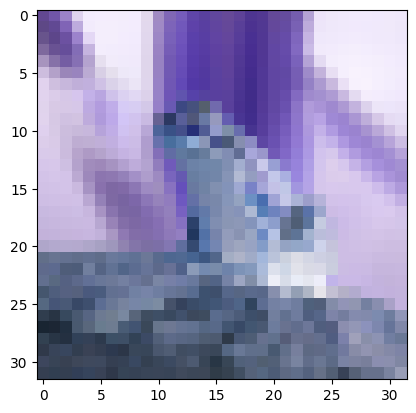

In [ ]:
file = returnArray(frog)
predicted_label = model.predict(file)
print("Przewidziana etykieta: ",predicted_label)

image = file.reshape(32,32,3)
plt.imshow(image, cmap=plt.cm.binary)